# DATA608 - Final Project

# South Korea vs Germany - the biggest upset in World Cup 2018

## By: Sang Yoon (Andy) Hwang
## Date: 2019-05-10

## why it is important:
South Korea vs Germany match during WC2018 is arguably one of the biggest upsets in World Cup history. Examining how South Korea won (or Germany lost) statistically is worth investigating. Each visualization and pivot table statistics reveals how "making the upset" was possible and one can refer this analysis as a guideline when it comes to preparing the match against big teams.

## data source:
link: https://github.com/statsbomb/open-data/tree/master/data 

The data sets are in json format. 

## data sets being used:
Match data consists of detailed information such as competition_name (e.g. World Cup 2018, English Primere League), country_name of each team and other relevent information by match_id.

Event data consists of detailed information on statistics of passes, shots, goals and other relevent information by each player and teams played for each match.

For this analysis, 43.json is used for match data (World Cup 2018) and 7567.json is used for event data (South Korea vs Germany).

## data handling
json_normalize was used to convert json into dataframe. There were no particular outliers. Coverted Nan to 0 and vice-versa.
Heatmap, goalmap and pivot tables were static where as bar graphs are interactive - Dash.

## data presentation
link: https://www.youtube.com/watch?v=go8k4m6vtBY&feature=youtu.be

## parameters of the data sets:
The data will focus on particular match only - South Korea vs Germany in WC 2018.
In Pitch-Pass-Heatmap (static), blue colored arrow indicates pass movements in 1st half where as red colored arrow is for 2nd half. For heatmap, dark green section is where the player had any type of movement. matplotlib and seaborn were used for this map.

In Pitch-Shot-Goalmap (static), red colored dots indicate goals and blue and green dots indicate shots that were not goal during the match. This is not by a player but overall statistics of 2 teams. matplotlib was used for this map.

In Dash - Bar Graph (interactive - Pass/Shot), one can select name of the team (South Korea/Germany) and select data points (e.g. first half - Ground/High/Low pass, second half - Ground/High/Low pass) in Dash interactively. The Bar Graph shows distribution of pass/shot types in 1st/2nd half by each player for each team you choose.

In [2]:
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import seaborn as sns
import pandas as pd
import urllib.request
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Full match information for WC 2018
with urllib.request.urlopen('https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/43.json') as data_file:    
    data = json.load(data_file)

match = json_normalize(data, sep = "_")
match.head()

,away_score,away_team_away_team_id,away_team_away_team_name,competition_competition_id,competition_competition_name,competition_country_name,data_version,home_score,home_team_home_team_id,home_team_home_team_name,kick_off,last_updated,match_date,match_id,match_status,referee_name,season_season_id,season_season_name,stadium_name
0,1,774,Egypt,43,FIFA World Cup,International,1.0.2,2,799,Saudi Arabia,16:00:00.000,2019-02-25T16:37:57.785859,2018-06-25,7559,available,None,3,2018,None
1,1,772,Spain,43,FIFA World Cup,International,1.0.2,0,797,Iran,20:00:00.000,2019-02-25T16:37:57.785859,2018-06-20,7543,available,None,3,2018,None
2,1,794,Mexico,43,FIFA World Cup,International,1.0.2,0,770,Germany,17:00:00.000,2019-02-25T16:37:57.785859,2018-06-17,7534,available,None,3,2018,None
3,0,795,Costa Rica,43,FIFA World Cup,International,1.0.2,2,781,Brazil,14:00:00.000,2019-02-25T16:37:57.785859,2018-06-22,7548,available,B. Kuipers,3,2018,None
4,2,784,Peru,43,FIFA World Cup,International,1.0.2,0,792,Australia,16:00:00.000,2019-02-25T16:37:57.785859,2018-06-26,7562,available,None,3,2018,None


In [4]:
# Let's find a match between South Korea vs Germany.
match[match['away_team_away_team_name'] == 'Germany']

# match_id = 7567, let'get player and event information using this id

,away_score,away_team_away_team_id,away_team_away_team_name,competition_competition_id,competition_competition_name,competition_country_name,data_version,home_score,home_team_home_team_id,home_team_home_team_name,kick_off,last_updated,match_date,match_id,match_status,referee_name,season_season_id,season_season_name,stadium_name
51,0,770,Germany,43,FIFA World Cup,International,1.0.2,2,791,South Korea,16:00:00.000,2019-05-03T13:32:00.206,2018-06-27,7567,available,M. Geiger,3,2018,None


In [5]:
# Let's get lineup information for match_id = 7567
with urllib.request.urlopen('https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups/7567.json') as data_file:    
    data = json.load(data_file)

player = json_normalize(data, sep = "_")
player.head()

,lineup,team_id,team_name
0,"[{'player_id': 3083, 'player_name': 'Heung-Min...",791,South Korea
1,"[{'player_id': 3496, 'player_name': 'Mesut Özi...",770,Germany


In [6]:
# It seems like our player dataframe is not parsed properly even with json_normalize. 
# Using for loop make dataframe from dictionary. 
df_new = []

for i in player.lineup:
    for j in i:
        df_new.append(j)   

# make it as dataframe
player = pd.DataFrame(df_new)
player.head(3)

# it seems like player['country'] is not parsed yet. Let's parse it completely
new_df = []

for i in player['country']:
    new_df.append(i)
    
country_df = pd.DataFrame(new_df)

# insert columns from country dataframe into player dataframe
player['id'] = country_df['id']
player['name'] = country_df['name']

In [7]:
# let's filter columns
player = player.loc[:,~player.columns.isin(['country'])]
player.head()

,jersey_number,player_id,player_name,id,name
0,7,3083,Heung-Min Son,121,Korea (South)
1,19,5604,Young-Gwon Kim,121,Korea (South)
2,20,5606,Hyun-Soo Jang,121,Korea (South)
3,2,5608,Yong Lee,121,Korea (South)
4,15,5618,Woo-Young Jung,121,Korea (South)


In [8]:
# We now have base information ready
# Now, get data for passing stats for each player
# let's retrieve event data set using match_id = 7567

with urllib.request.urlopen('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/7567.json') as data_file:    
    data = json.load(data_file)
event = json_normalize(data, sep = "_")
event.head()

,ball_receipt_outcome_id,ball_receipt_outcome_name,ball_recovery_recovery_failure,block_deflection,block_offensive,clearance_aerial_won,dribble_nutmeg,dribble_outcome_id,dribble_outcome_name,dribble_overrun,duel_outcome_id,duel_outcome_name,duel_type_id,duel_type_name,duration,foul_committed_card_id,foul_committed_card_name,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_end_location,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_type_id,goalkeeper_type_name,id,index,interception_outcome_id,interception_outcome_name,location,minute,off_camera,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_backheel,pass_body_part_id,pass_body_part_name,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height_id,pass_height_name,pass_length,pass_miscommunication,pass_outcome_id,pass_outcome_name,pass_recipient_id,pass_recipient_name,pass_shot_assist,pass_switch,pass_type_id,pass_type_name,period,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,possession,possession_team_id,possession_team_name,related_events,second,shot_aerial_won,shot_body_part_id,shot_body_part_name,shot_end_location,shot_first_time,shot_follows_dribble,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome_id,shot_outcome_name,shot_statsbomb_xg,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,tactics_formation,tactics_lineup,team_id,team_name,timestamp,type_id,type_name,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,453c85ed-1fa2-4b1e-afc7-0c8c2eb12817,1,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,Regular Play,NaN,NaN,NaN,NaN,1,791,South Korea,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.0,"[{'player': {'id': 5619, 'name': 'Hyun-Woo Cho...",791,South Korea,00:00:00.000,35,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1f324edf-af4a-4728-baa5-c5d39c4d7a4d,2,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,Regular Play,NaN,NaN,NaN,NaN,1,791,South Korea,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4231.0,"[{'player': {'id': 5570, 'name': 'Manuel Neuer...",770,Germany,00:00:00.000,35,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c8efdac8-d54d-4bb9-9fcc-bf8f5ba9d7ce,3,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,Regular Play,NaN,NaN,NaN,NaN,1,791,South Korea,[42a94556-c0b7-4e55-b1a0-4abda9020b08],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,791,South Korea,00:00:00.000,18,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42a94556-c0b7-4e55-b1a0-4abda9020b08,4,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,Regular Play,NaN,NaN,NaN,NaN,1,791,South Korea,[c8efdac8-d54d-4bb9-9fcc-bf8f5ba9d7ce],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,770,Germany,00:00:00.000,18,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [9]:
# we will use event data heavily for Pivot Tables and heat/goal map
# for each column in event, check if there is null value
# well, we do have nulls but nothing serious; obiously you cannot have pass_cross every time for each player, for instance
event.isnull().sum()

ball_receipt_outcome_id           2763
ball_receipt_outcome_name         2763
ball_recovery_recovery_failure    2851
block_deflection                  2863
block_offensive                   2863
clearance_aerial_won              2862
dribble_nutmeg                    2862
dribble_outcome_id                2828
dribble_outcome_name              2828
dribble_overrun                   2863
duel_outcome_id                   2834
duel_outcome_name                 2834
duel_type_id                      2820
duel_type_name                    2820
duration                          1185
foul_committed_card_id            2860
foul_committed_card_name          2860
foul_committed_offensive          2862
foul_committed_type_id            2861
foul_committed_type_name          2861
foul_won_defensive                2856
goalkeeper_body_part_id           2854
goalkeeper_body_part_name         2854
goalkeeper_end_location           2834
goalkeeper_outcome_id             2847
goalkeeper_outcome_name  

In [10]:
# nothing really serious -- as data sets are usually ids, we don't really need to worry about outliers or dirty data
# we will use data as it is
event.describe()

,ball_receipt_outcome_id,dribble_outcome_id,duel_outcome_id,duel_type_id,duration,foul_committed_card_id,foul_committed_type_id,goalkeeper_body_part_id,goalkeeper_outcome_id,goalkeeper_position_id,goalkeeper_technique_id,goalkeeper_type_id,index,interception_outcome_id,minute,pass_angle,pass_body_part_id,pass_height_id,pass_length,pass_outcome_id,pass_recipient_id,pass_type_id,period,play_pattern_id,player_id,position_id,possession,possession_team_id,second,shot_body_part_id,shot_outcome_id,shot_statsbomb_xg,shot_technique_id,shot_type_id,substitution_outcome_id,substitution_replacement_id,tactics_formation,team_id,type_id
count,101.0,36.000000,30.000000,44.000000,1679.000000,4.0,3.000000,10.00,17.000000,41.000000,10.000000,47.000000,2864.00000,14.000000,2864.000000,993.000000,948.000000,993.000000,993.000000,178.000000,916.000000,155.000000,2864.000000,2864.000000,2794.000000,2794.000000,2864.000000,2864.000000,2864.000000,41.000000,41.000000,41.000000,41.000000,41.000000,6.000000,6.000000,5.000000,2864.000000,2864.000000
mean,9.0,8.361111,12.266667,10.681818,1.717607,7.0,22.333333,36.00,35.529412,43.853659,45.500000,31.361702,1432.50000,13.214286,46.484637,0.006378,39.636076,1.416918,21.089589,22.494382,5394.755459,65.109677,1.515014,3.542598,5465.623837,11.392627,83.746159,776.225209,29.864176,39.658537,98.000000,0.103633,93.195122,86.390244,102.833333,5769.166667,2715.400000,777.882332,28.898743
std,0.0,0.487136,5.179091,0.471155,21.853409,0.0,1.527525,2.00,20.006617,0.527303,0.527046,2.191144,826.90991,4.098378,27.172450,1.550233,3.467369,0.756288,14.224497,26.879990,886.868720,1.935880,0.499862,2.404066,810.560913,7.363176,47.069944,9.592095,17.557193,5.018016,1.581139,0.152773,0.600812,3.904344,0.408248,319.236224,2071.218554,10.170247,12.047940
min,9.0,8.000000,4.000000,10.000000,0.000000,7.0,21.000000,35.00,15.000000,42.000000,45.000000,25.000000,1.00000,4.000000,0.000000,-3.098142,37.000000,1.000000,0.000000,9.000000,3083.000000,61.000000,1.000000,1.000000,3083.000000,1.000000,1.000000,770.000000,0.000000,37.000000,96.000000,0.014046,93.000000,62.000000,102.000000,5555.000000,442.000000,770.000000,2.000000
25%,9.0,8.000000,6.250000,10.000000,0.718500,7.0,21.500000,35.00,15.000000,44.000000,45.000000,32.000000,716.75000,13.000000,24.000000,-1.281821,38.000000,1.000000,11.661903,9.000000,5559.000000,63.000000,1.000000,1.000000,5566.000000,5.000000,48.000000,770.000000,14.000000,38.000000,96.000000,0.028653,93.000000,87.000000,103.000000,5562.750000,451.000000,770.000000,17.000000
50%,9.0,8.000000,16.000000,11.000000,1.080000,7.0,22.000000,35.00,52.000000,44.000000,45.500000,32.000000,1432.50000,14.000000,46.000000,0.117109,40.000000,1.000000,17.804493,9.000000,5574.000000,66.000000,2.000000,4.000000,5579.000000,13.000000,82.000000,770.000000,30.000000,40.000000,98.000000,0.056727,93.000000,87.000000,103.000000,5592.500000,4222.000000,770.000000,30.000000
75%,9.0,9.000000,16.000000,11.000000,1.533000,7.0,23.000000,35.75,53.000000,44.000000,46.000000,32.000000,2148.25000,16.000000,69.000000,1.180189,40.000000,2.000000,26.925823,9.000000,5623.000000,66.000000,2.000000,6.000000,5627.000000,16.000000,119.000000,791.000000,45.000000,40.000000,100.000000,0.113583,93.000000,87.000000,103.000000,5896.000000,4231.000000,791.000000,42.000000
max,9.0,9.000000,16.000000,11.000000,895.920000,7.0,24.000000,41.00,58.000000,44.000000,46.000000,33.000000,2864.00000,16.000000,99.000000,3.141593,70.000000,3.000000,97.718990,77.000000,6325.000000,67.000000,2.000000,9.000000,6325.000000,25.000000,179.000000,791.000000,59.000000,70.000000,101.000000,0.876465,95.000000,87.000000,103.000000,6325.000000,4231.000000,791.000000,42.000000


# Pivot Table - Pass

In [11]:
# let's create pass_stat Pivot Table 
# pass stat for all players -- period 1: 1st half, period 2: 2nd half
pass_stat = pd.pivot_table(event, index = ['player_name', 'team_name'], fill_value = 0, columns = ['pass_height_name', 'period'], values=['pass_height_id'], aggfunc=lambda x: (x.count()), margins = True, margins_name= 'Total count')
pass_stat.sort_values(by=['team_name','player_name'])

# you can save the stat in csv
#pass_stat.to_csv(r'C:\Users\ahwang\Desktop\Operations\Tom\wc18_pass_stat.csv', index = True, header=True)

pass_height_id                                            
pass_height_name                  Ground Pass      High Pass     Low Pass     Total count
period                                      1    2         1   2        1   2            
player_name        team_name                                                             
Total count                               365  377        84  79       38  50       993.0
Jonas Hector       Germany                 22   17         4   3        9   2        57.0
Joshua Kimmich     Germany                 37   31         6   6        5   6        91.0
Julian Brandt      Germany                  0    9         0   0        0   5        14.0
Leon Goretzka      Germany                 17    1         2   0        1   1        22.0
Manuel Neuer       Germany                 13   14         2   2        0   0        31.0
Marco Reus         Germany                 14   22         0   1        3   3        43.0
Mario Gómez García Germany                  0    4         0   1        0   0         5.0
Mats Hummels       Germany                 23   35         7   1        1   2        69.0
Mesut Özil         Germany                 35   52         2   4        1   1        95.0
Niklas Süle        Germany                 48   23         7   2        4   2        86.0
Sami Khedira       Germany                 30    9         5   0        4   1        49.0
Thomas Müller      Germany                  0   10         0   2        0   2        14.0
Timo Werner        Germany                  9   18         0   4        4   5        40.0
Toni Kroos         Germany                 44   51         4  10        3   6       118.0
Chul Hong          South Korea              8    5         6   9        0   2        30.0
Hee-Chan Hwang     South Korea              0    3         0   0        0   0         3.0
Heung-Min Son      South Korea              3    9         3   2        0   2        19.0
Hyun-Soo Jang      South Korea              9    5         1   1        0   2        18.0
Hyun-Woo Cho       South Korea              2    2        14  12        0   1        31.0
Ja-Cheol Koo       South Korea              4    1         1   0        0   1         7.0
Jae-Sung Lee       South Korea              9   19         4   2        0   2        36.0
Se-Jong Ju         South Korea              0    5         0   3        0   0         8.0
Seon-Min Moon      South Korea              3    5         0   0        1   2        11.0
Woo-Young Jung     South Korea             10   11         3   5        0   0        29.0
Yo-Han Ko          South Korea              0    2         0   0        0   1         3.0
Yong Lee           South Korea              8    7         9   7        1   1        33.0
Young-Gwon Kim     South Korea             10    4         4   1        0   0        19.0
Young-Sun Yun      South Korea              7    3         0   1        1   0        12.0

In [12]:
# Let's make life simpler - get all pass stats by pass type for each country
#let's reset index for graphing in Dash - it's easier when parameter is player_name/team_name
pass_stat = pass_stat.reset_index()


# germany
germany = pass_stat[pass_stat['team_name'] == 'Germany']
germany_pass = germany.pass_height_id
germany_gp = germany_pass['Ground Pass']
germany_hp = germany_pass['High Pass']
germany_lp = germany_pass['Low Pass']

# south korea
korea = pass_stat[pass_stat['team_name'] == 'South Korea']
korea_pass = korea.pass_height_id
korea_gp = korea_pass['Ground Pass']
korea_hp = korea_pass['High Pass']
korea_lp = korea_pass['Low Pass']

In [13]:
# let's get players name and convert them into dataframe
german_players = pd.DataFrame(germany['player_name'])
korean_players = pd.DataFrame(korea['player_name'])

In [14]:
# let's join prop. for german ground-pass dataframe with german player names 
germany_prop_gp = ( germany_gp / (germany_gp + germany_hp + germany_lp) ) * 100
germany_prop_gp = germany_prop_gp.join(german_players, how="inner")

# let's concat 3 different pass types
germany_prop_lp = ( germany_lp / (germany_gp + germany_hp + germany_lp) ) * 100
germany_prop_hp = ( germany_hp / (germany_gp + germany_hp + germany_lp) ) * 100


germany_prop = pd.concat([germany_prop_gp, germany_prop_lp, germany_prop_hp], axis=1)
germany_prop.columns = ['1-Ground Pass', '2-Ground Pass', 'player_name', '1-Low Pass', '2-Low Pass', '1-High Pass', '2-High Pass']
germany_prop = germany_prop.sort_index(axis=1)

# since we have some 0 after calculation we will replace all 0 elements with Nans 
### NOTE: we get prop. by 1st/2nd half -- some players who did not even make single 2-Low Pass might have 0 in stat
### What we need is that we need to "exclude" all these 0 passes when we calculate mean of successful pass rates for each pass type

# germany_prop.fillna(method='backfill', inplace = True)
germany_prop.replace(0, np.NaN, inplace = True)

# now looks good
germany_prop

,1-Ground Pass,1-High Pass,1-Low Pass,2-Ground Pass,2-High Pass,2-Low Pass,player_name
7,62.857143,11.428571,25.714286,77.272727,13.636364,9.090909,Jonas Hector
8,77.083333,12.500000,10.416667,72.093023,13.953488,13.953488,Joshua Kimmich
9,NaN,NaN,NaN,64.285714,NaN,35.714286,Julian Brandt
10,85.000000,10.000000,5.000000,50.000000,NaN,50.000000,Leon Goretzka
11,86.666667,13.333333,NaN,87.500000,12.500000,NaN,Manuel Neuer
12,82.352941,NaN,17.647059,84.615385,3.846154,11.538462,Marco Reus
13,NaN,NaN,NaN,80.000000,20.000000,NaN,Mario Gómez García
14,74.193548,22.580645,3.225806,92.105263,2.631579,5.263158,Mats Hummels
15,92.105263,5.263158,2.631579,91.228070,7.017544,1.754386,Mesut Özil
16,81.355932,11.864407,6.779661,85.185185,7.407407,7.407407,Niklas Süle


In [15]:
# let's get mean of passing rates for German players (only for those who made at least 1 successful passes)
# On average, player devoted 79.5% of total passes to Ground Pass in 1st half and 77.8% in 2nd half
round(germany_prop,2).mean()

1-Ground Pass    79.458182
1-High Pass      11.957778
1-Low Pass       11.833000
2-Ground Pass    77.751429
2-High Pass      11.366364
2-Low Pass       15.540000
dtype: float64

In [16]:
# let's join prop. for korean ground-pass dataframe with korean player names 
korea_prop_gp = ( korea_gp / (korea_gp + korea_hp + korea_lp) ) * 100
korea_prop_gp = korea_prop_gp.join(korean_players, how="inner")

# let's concat 3 different pass types
korea_prop_lp = ( korea_lp / (korea_gp + korea_hp + korea_lp) ) * 100
korea_prop_hp = ( korea_hp / (korea_gp + korea_hp + korea_lp) ) * 100


korea_prop = pd.concat([korea_prop_gp, korea_prop_lp, korea_prop_hp], axis=1)
korea_prop.columns = ['1-Ground Pass', '2-Ground Pass', 'player_name', '1-Low Pass', '2-Low Pass', '1-High Pass', '2-High Pass']
korea_prop = korea_prop.sort_index(axis=1)

# since we have some 0 after calculation we will replace all 0 elements with Nans 
### NOTE: we get prop. by 1st/2nd half -- some players who did not even make single 2-Low Pass might have 0 in stat
### What we need is that we need to "exclude" all these 0 passes when we calculate mean of successful pass rates for each pass type

# since we have some Nans after calculation we will replace all Nans elements with 0 
korea_prop.replace(0, np.NaN, inplace = True)

# now looks good
korea_prop

,1-Ground Pass,1-High Pass,1-Low Pass,2-Ground Pass,2-High Pass,2-Low Pass,player_name
0,57.142857,42.857143,NaN,31.250000,56.250000,12.500000,Chul Hong
1,NaN,NaN,NaN,100.000000,NaN,NaN,Hee-Chan Hwang
2,50.000000,50.000000,NaN,69.230769,15.384615,15.384615,Heung-Min Son
3,90.000000,10.000000,NaN,62.500000,12.500000,25.000000,Hyun-Soo Jang
4,12.500000,87.500000,NaN,13.333333,80.000000,6.666667,Hyun-Woo Cho
5,80.000000,20.000000,NaN,50.000000,NaN,50.000000,Ja-Cheol Koo
6,69.230769,30.769231,NaN,82.608696,8.695652,8.695652,Jae-Sung Lee
18,NaN,NaN,NaN,62.500000,37.500000,NaN,Se-Jong Ju
19,75.000000,NaN,25.000000,71.428571,NaN,28.571429,Seon-Min Moon
23,76.923077,23.076923,NaN,68.750000,31.250000,NaN,Woo-Young Jung


In [17]:
# let's get mean of passing rates for Korean players (only for those who made at least 1 successful passes)
# On average, player devoted 65% of total passes to Ground Pass in 1st half and 62.9% in 2nd half
round(korea_prop,2).mean()

1-Ground Pass    64.923636
1-High Pass      38.086667
1-Low Pass       14.353333
2-Ground Pass    62.852857
2-High Pass      33.325000
2-Low Pass       20.757778
dtype: float64

# Analysis on Pivot Table - Pass:

From this view, we know Korean players, on average, have higher proportion (devotion rate to pass) of high and low passes than Germans both in 1st and 2nd half.

What does this tell us? Koreans played typical "defensive counter-attack" style where as Germans played typical "offensive possessive" style.

Koreans did well in counter-attack; this could be key reason why they ended up scoring twice and conceding no goal.

Let's now look at Bar Graph to see overvall pass distributions by player.

# Dash - Pass (Bar Graph)

In [49]:
# Let's create pass statistics by pass_type (1st and 2nd half)
import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

df = pass_stat

available_indicators = df['team_name'].unique()

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)


app.layout = html.Div([
    html.H1('Pass Statistics by team_name'),
    html.Div('''
        WC 2018 - South Korea vs Germany
    '''),
    dcc.Dropdown(
        id='my-dropdown',
        options=[{'label': i, 'value': i} for i in available_indicators],
        value='South Korea'
    ),
    dcc.Graph(
        id='example-graph'    
    )
    
])

@app.callback(
    dash.dependencies.Output('example-graph', 'figure'),
    [dash.dependencies.Input('my-dropdown', 'value')])

def update_output(selected_dropdown_value):
    dff = pass_stat[pass_stat['team_name'] == selected_dropdown_value]
    dff_pass = dff.pass_height_id
    dff_gp = dff_pass['Ground Pass']
    dff_hp = dff_pass['High Pass']
    dff_lp = dff_pass['Low Pass']
    
    figure = {
            'data': [
                {'x': dff.player_name, 'y': dff_gp.loc[:,1], 'type': 'bar', 'name': '1st half - Ground Pass'},
                {'x': dff.player_name, 'y': dff_hp.loc[:,1], 'type': 'bar', 'name': '1st half - High Pass'},
                {'x': dff.player_name, 'y': dff_lp.loc[:,1], 'type': 'bar', 'name': '1st half - Low Pass'},
                {'x': dff.player_name, 'y': dff_gp.loc[:,2], 'type': 'bar', 'name': '2nd half - Ground Pass'},
                {'x': dff.player_name, 'y': dff_hp.loc[:,2], 'type': 'bar', 'name': '2nd half - High Pass'},
                {'x': dff.player_name, 'y': dff_lp.loc[:,2], 'type': 'bar', 'name': '2nd half - Low Pass'}
            ],
            'layout': {
                'title': 'Number of passes made by pass type'
            }
        }
    return figure 


if __name__ == '__main__':
    app.run_server()

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [11/May/2019 11:37:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/May/2019 11:37:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/May/2019 11:37:41] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [11/May/2019 11:37:41] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [11/May/2019 11:37:41] "POST /_dash-update-component HTTP/1.1" 200 -


# Analysis on Bar Graph - Pass:

From this view, we confirmed that Germans made most of offensive passes; ground passes.
Notably, Toni Kroos and Ozil made most of ground passes for Germans but these passes did not lead to goal.
Let's now examine Shot Statistics.


# Pivot Table - Shot

In [19]:
# shot stat for all players
shot_stat = pd.pivot_table(event, index = ['player_name', 'team_name'], fill_value = 0, columns = ['shot_outcome_name', 'period'], values=['shot_outcome_id'], aggfunc=lambda x: (x.count()), margins = True, margins_name= 'Total count')
#shot_stat.sort_values(by=['team_name','player_name'])
shot_stat.sort_values(by=['team_name','player_name'], ascending = False)

# you can save the stat in csv
#shot_stat.to_csv(r'C:\Users\ahwang\Desktop\Operations\Tom\wc18_shot_stat.csv', index = True, header=True)

shot_outcome_id                                                  
shot_outcome_name                      Blocked    Goal Off T     Saved    Wayward    Total count
period                                       1  2    2     1   2     1  2       1  2            
player_name        team_name                                                                    
Young-Gwon Kim     South Korea               0  0    1     0   0     0  0       0  0         1.0
Yong Lee           South Korea               0  0    0     1   0     0  0       0  0         1.0
Woo-Young Jung     South Korea               0  0    0     0   0     1  2       0  0         3.0
Jae-Sung Lee       South Korea               0  1    0     0   0     0  0       0  0         1.0
Heung-Min Son      South Korea               0  0    1     2   3     0  0       0  0         6.0
Toni Kroos         Germany                   0  1    0     0   3     0  1       0  0         5.0
Timo Werner        Germany                   1  0    0     0   2     0  0       0  0         3.0
Thomas Müller      Germany                   0  1    0     0   1     0  0       0  1         3.0
Sami Khedira       Germany                   0  1    0     0   0     1  0       0  0         2.0
Mesut Özil         Germany                   1  0    0     0   0     0  0       0  0         1.0
Mats Hummels       Germany                   0  1    0     0   3     1  0       0  0         5.0
Mario Gómez García Germany                   0  1    0     0   0     0  1       0  0         2.0
Marco Reus         Germany                   1  0    0     1   1     0  0       0  0         3.0
Leon Goretzka      Germany                   0  0    0     0   0     0  1       1  0         2.0
Julian Brandt      Germany                   0  1    0     0   0     0  1       0  0         2.0
Joshua Kimmich     Germany                   0  1    0     0   0     0  0       0  0         1.0
Total count                                  3  8    2     4  13     3  6       1  1        41.0

In [20]:
# Let's make life simpler - get all shot stats by shot type for each country
#let's reset index for graphing in Dash - it's easier when parameter is player_name/team_name
shot_stat = shot_stat.reset_index()


# germany
germany = shot_stat[shot_stat['team_name'] == 'Germany']
germany_shot = germany.shot_outcome_id
germany_bl = germany_shot['Blocked']
germany_go = germany_shot['Goal']
germany_off = germany_shot['Off T']
germany_sav = germany_shot['Saved']
germany_way = germany_shot['Wayward']

# south korea
korea = shot_stat[shot_stat['team_name'] == 'South Korea']
korea_shot = korea.shot_outcome_id
korea_bl = korea_shot['Blocked']
korea_go = korea_shot['Goal']
korea_off = korea_shot['Off T']
korea_sav = korea_shot['Saved']
korea_way = korea_shot['Wayward']

In [21]:
# let's get players name and convert them into dataframe
german_players = pd.DataFrame(germany['player_name'])
korean_players = pd.DataFrame(korea['player_name'])

In [22]:
# since we know Germany did not score in 1st half, we are missing 1st half column. we need to fill 0 in 1st half
germany_go.loc[:,1] = 0
germany_go = germany_go.sort_index(axis=1)

# let's join prop. for German blocked-shot dataframe with German player names 
germany_prop_bl = ( germany_bl / (germany_bl + germany_go + germany_off + germany_sav + germany_way) ) * 100
germany_prop_bl = germany_prop_bl.join(german_players, how="inner")

# let's concat 5 different shot types
germany_prop_go = ( germany_go / (germany_bl + germany_go + germany_off + germany_sav + germany_way) ) * 100
germany_prop_off = ( germany_off / (germany_bl + germany_go + germany_off + germany_sav + germany_way) ) * 100
germany_prop_sav = ( germany_sav / (germany_bl + germany_go + germany_off + germany_sav + germany_way) ) * 100
germany_prop_way = ( germany_way / (germany_bl + germany_go + germany_off + germany_sav + germany_way) ) * 100


germany_prop = pd.concat([germany_prop_bl, germany_prop_go, germany_prop_off,germany_prop_sav,germany_prop_way], axis=1)
germany_prop.columns = ['1-Blocked', '2-Blocked', 'player_name', '1-Goal', '2-Goal', '1-Off T', '2-Off T', '1-Saved', '2-Saved', '1-Wayward', '2-Wayward']
germany_prop = germany_prop.sort_index(axis=1)

# unlike pass stats, we will replace Nan with 0
germany_prop.replace(np.nan, 0, inplace = True)

# now looks good
germany_prop

C:\Users\andy\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\andy\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,1-Blocked,1-Goal,1-Off T,1-Saved,1-Wayward,2-Blocked,2-Goal,2-Off T,2-Saved,2-Wayward,player_name
2,0.0,0.0,0.0,0.0,0.0,100.000000,0.0,0.000000,0.0,0.000000,Joshua Kimmich
3,0.0,0.0,0.0,0.0,0.0,50.000000,0.0,0.000000,50.0,0.000000,Julian Brandt
4,0.0,0.0,0.0,0.0,100.0,0.000000,0.0,0.000000,100.0,0.000000,Leon Goretzka
5,50.0,0.0,50.0,0.0,0.0,0.000000,0.0,100.000000,0.0,0.000000,Marco Reus
6,0.0,0.0,0.0,0.0,0.0,50.000000,0.0,0.000000,50.0,0.000000,Mario Gómez García
7,0.0,0.0,0.0,100.0,0.0,25.000000,0.0,75.000000,0.0,0.000000,Mats Hummels
8,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,Mesut Özil
9,0.0,0.0,0.0,100.0,0.0,100.000000,0.0,0.000000,0.0,0.000000,Sami Khedira
10,0.0,0.0,0.0,0.0,0.0,33.333333,0.0,33.333333,0.0,33.333333,Thomas Müller
11,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,100.000000,0.0,0.000000,Timo Werner


In [23]:
# since we know Koreans did not score in 1st half, we are missing 1st half column. we need to fill 0 in 1st half
korea_go.loc[:,1] = 0
korea_go = korea_go.sort_index(axis=1)

# let's join prop. for Korean blocked-shot dataframe with Korean player names 
korea_prop_bl = ( korea_bl / (korea_bl + korea_go + korea_off + korea_sav + korea_way) ) * 100
korea_prop_bl = korea_prop_bl.join(korean_players, how="inner")

# let's concat 5 different shot types
korea_prop_go = ( korea_go / (korea_bl + korea_go + korea_off + korea_sav + korea_way) ) * 100
korea_prop_off = ( korea_off / (korea_bl + korea_go + korea_off + korea_sav + korea_way) ) * 100
korea_prop_sav = ( korea_sav / (korea_bl + korea_go + korea_off + korea_sav + korea_way) ) * 100
korea_prop_way = ( korea_way / (korea_bl + korea_go + korea_off + korea_sav + korea_way) ) * 100


korea_prop = pd.concat([korea_prop_bl, korea_prop_go, korea_prop_off,korea_prop_sav,korea_prop_way], axis=1)
korea_prop.columns = ['1-Blocked', '2-Blocked', 'player_name', '1-Goal', '2-Goal', '1-Off T', '2-Off T', '1-Saved', '2-Saved', '1-Wayward', '2-Wayward']
korea_prop = korea_prop.sort_index(axis=1)

# unlike pass stats, we will replace Nan with 0
korea_prop.replace(np.nan, 0, inplace = True)

# now looks good
korea_prop

C:\Users\andy\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\andy\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,1-Blocked,1-Goal,1-Off T,1-Saved,1-Wayward,2-Blocked,2-Goal,2-Off T,2-Saved,2-Wayward,player_name
0,0.0,0.0,100.0,0.0,0.0,0.0,25.0,75.0,0.0,0.0,Heung-Min Son
1,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,Jae-Sung Lee
13,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,Woo-Young Jung
14,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yong Lee
15,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Young-Gwon Kim


# Analysis on Pivot Table - Shot:

From this view, we know Korean players had less players involved with shots but scored twice.
Young-Gwon Kim, for example, had only 1 shot and it led to goal (100% accuracy). Also notice that most of Korean shots were not even saved; only Woo-Young Jung had shots that were saved by keeper.

What does this tell us? Again, this proves that Koreans played very efficiently.

Koreans did well in counter-attack; this could be key reason why they ended up scoring twice and conceding no goal.

Let's now look at Bar Graph to see overvall shot distributions by player.

# Dash - Shot (Bar Graph)

In [48]:
# Let's create pass statistics by shot_type (1st and 2nd half)
import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']



df = shot_stat

available_indicators = df['team_name'].unique()

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)


app.layout = html.Div([
    html.H1('Shot Statistics by team_name'),
    html.Div('''
        WC 2018 - South Korea vs Germany
    '''),
    dcc.Dropdown(
        id='my-dropdown',
        options=[{'label': i, 'value': i} for i in available_indicators],
        value='South Korea'
    ),
    dcc.Graph(
        id='example-graph'    
    )
    
])

@app.callback(
    dash.dependencies.Output('example-graph', 'figure'),
    [dash.dependencies.Input('my-dropdown', 'value')])

def update_output(selected_dropdown_value):
    dff = shot_stat[shot_stat['team_name'] == selected_dropdown_value]
    dff_shot = dff.shot_outcome_id
    dff_bl = dff_shot['Blocked']
    dff_go = dff_shot['Goal']
    dff_go.loc[:,1] = 0
    dff_go = dff_go.sort_index(axis=1)
    dff_off = dff_shot['Off T']
    dff_sav = dff_shot['Saved']
    dff_way = dff_shot['Wayward']
    
    figure = {
            'data': [
                {'x': dff.player_name, 'y': dff_bl.loc[:,1], 'type': 'bar', 'name': '1st half - Blocked'},
                {'x': dff.player_name, 'y': dff_go.loc[:,1], 'type': 'bar', 'name': '1st half - Goal'},
                {'x': dff.player_name, 'y': dff_off.loc[:,1], 'type': 'bar', 'name': '1st half - Off T'},
                {'x': dff.player_name, 'y': dff_sav.loc[:,1], 'type': 'bar', 'name': '1st half - Saved'},
                {'x': dff.player_name, 'y': dff_way.loc[:,1], 'type': 'bar', 'name': '1st half - Wayward'},
                
                {'x': dff.player_name, 'y': dff_bl.loc[:,2], 'type': 'bar', 'name': '2nd half - Blocked'},
                {'x': dff.player_name, 'y': dff_go.loc[:,2], 'type': 'bar', 'name': '2nd half - Goal'},
                {'x': dff.player_name, 'y': dff_off.loc[:,2], 'type': 'bar', 'name': '2nd half - Off T'},
                {'x': dff.player_name, 'y': dff_sav.loc[:,2], 'type': 'bar', 'name': '2nd half - Saved'},
                {'x': dff.player_name, 'y': dff_way.loc[:,2], 'type': 'bar', 'name': '2nd half - Wayward'}
            ],
            'layout': {
                'title': 'Number of shots made by shot type'
            }
        }
    return figure 


if __name__ == '__main__':
    app.run_server()

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [11/May/2019 01:20:25] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/May/2019 01:20:25] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/May/2019 01:20:26] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [11/May/2019 01:20:26] "GET /_dash-dependencies HTTP/1.1" 200 -
C:\Users\andy\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\andy\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

# Analysis on Dash - Shot (Bar Graph):

From this view, we confirmed that Germans surely made more shots. It is quite disappointing that all of shots by Timo Wiener(striker) were Off Target in 2nd half.

# Pitch-Pass-Heatmap 

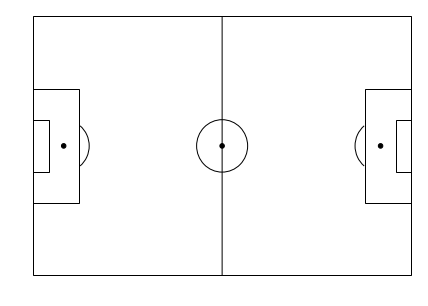

In [47]:
# let's draw pitch for our analysis
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = plt.Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = plt.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = plt.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = mpl.patches.ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = plt.Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = plt.Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = mpl.patches.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = mpl.patches.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)


fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
plt.show()

In [26]:
# loading the json file and create pass map for Toni Kroos from event
toni_pass = event[(event['type_name'] == "Pass") & (event['player_name']=='Toni Kroos')] # get passing information of Ozil
pass_column = [i for i in event.columns if i.startswith("pass")]
toni_pass = toni_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]
toni_pass.head()

,id,period,timestamp,location,pass_end_location,pass_recipient_name
7,28ce5dc1-513a-4b6d-a8f4-c6a62ad3cd28,1,00:00:01.880,"[49.0, 35.0]","[58.0, 42.0]",Mesut Özil
16,0de4b7f2-7751-4f88-8730-aea589d4b26b,1,00:00:08.680,"[47.0, 36.0]","[28.0, 56.0]",Niklas Süle
23,2cbb65fd-137f-4b30-91b9-d2c7e5d76d76,1,00:00:17.040,"[28.0, 45.0]","[28.0, 57.0]",Sami Khedira
30,94e9110e-e495-4dec-a55b-811e6616284e,1,00:00:26.307,"[34.0, 32.0]","[47.0, 38.0]",Sami Khedira
34,cbd0a9b7-e529-478c-8d31-07bb115e6e87,1,00:00:28.360,"[39.0, 36.0]","[54.0, 62.0]",Niklas Süle


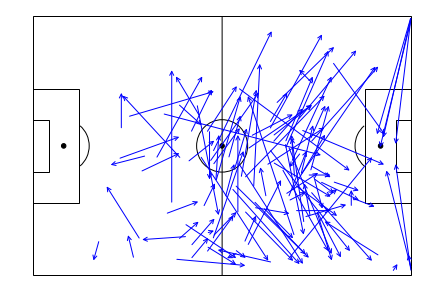

In [27]:
# Let annotate pass annotations of Toni on pitch
fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')


for i in range(len(toni_pass)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (toni_pass.iloc[i]['pass_end_location'][0], toni_pass.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (toni_pass.iloc[i]['location'][0], toni_pass.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)

plt.show()

C:\Users\andy\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning:

The following kwargs were not used by contour: 'color'



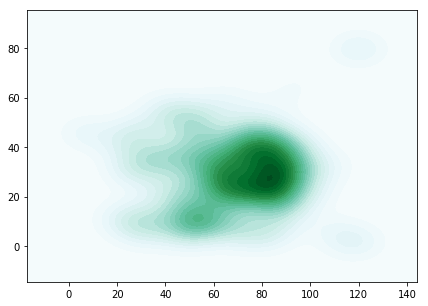

In [28]:
# Let's draw heatmap of Toni's entire movement
import seaborn as sns
toni_action = event[event['player_name']=='Toni Kroos']

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

x_coord = [i[0] for i in toni_action["location"]]
y_coord = [i[1] for i in toni_action["location"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()

In [29]:
# Let combine all 3: pitch, annotation and heatmap -- draw all of them on the pitch at the same time
def combine_heat_pitch_map(player_name, type_name):
    type_data = event[(event['type_name'] == type_name) & (event['player_name']==player_name)]
    movement_data = event[event['player_name']==player_name]

    # pitch from draw_pitch(ax)
    fig=plt.figure() #set up the figures
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax) #overlay our different objects on the pitch
    plt.axis('off')


    # annotation of Toni's pass (maybe we can divide this into 1st and 2nd half)
    for i in range(len(type_data)):
        # annotate draw an arrow from a current position to pass_end_location
        color = "blue" if type_data.iloc[i]['period'] == 1 else "red"  # If passes are from halftime, color blue, otherwise red
        ax.annotate("", xy = (type_data.iloc[i]['pass_end_location'][0], type_data.iloc[i]['pass_end_location'][1]), xycoords = 'data',
                   xytext = (type_data.iloc[i]['location'][0], type_data.iloc[i]['location'][1]), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)

    # heatmap of entire movement
    x_coord = [i[0] for i in movement_data["location"]]
    y_coord = [i[1] for i in movement_data["location"]]

        #shades: give us the heat map we desire
        # n_levels: draw more lines, the larger n, the more blurry it looks
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)



    # Draw all of them on the pitch
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)

    plt.show()

C:\Users\andy\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning:

The following kwargs were not used by contour: 'color'



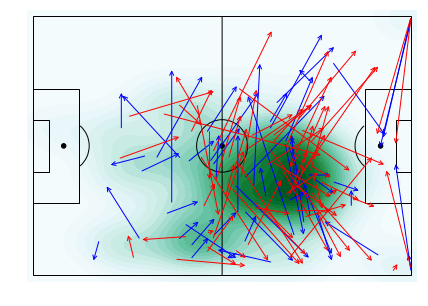

In [30]:
# We can now filter by player_name and type_name
combine_heat_pitch_map(player_name = 'Toni Kroos', type_name = 'Pass')

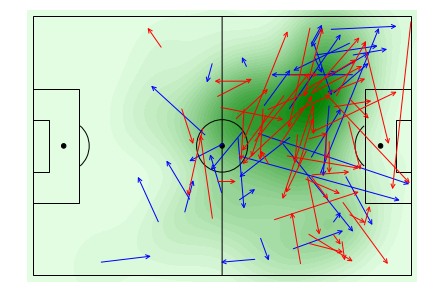

In [20]:
# Let's also try Ozil
combine_heat_pitch_map(player_name = 'Mesut Özil', type_name = 'Pass')
# Compared to Ozil, we can see that Toni Kroos made more direct pass near panelty line both in 1st and 2nd half.

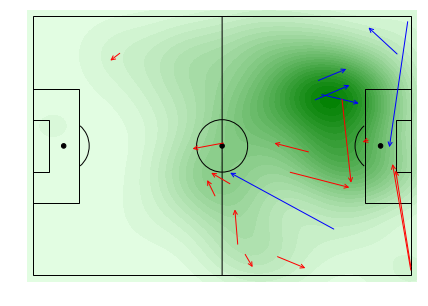

In [22]:
# Let's also try Son
combine_heat_pitch_map(player_name = 'Heung-Min Son', type_name = 'Pass')
# Compared to Germans, he did not have many chances to pass but notice that he passes only from either left (blue - 1st half) or right (red - 2nd half)
# It is pretty evident that he was more of winger than center-forward during this match

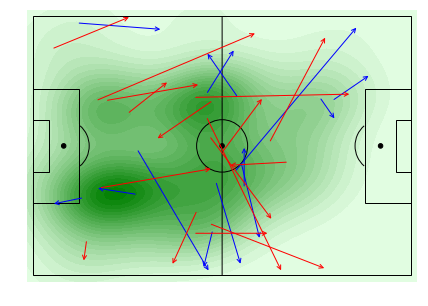

In [237]:
# Woo-Young Jung, who had 2nd most shots for South Korea after Son
combine_heat_pitch_map(player_name = 'Woo-Young Jung', type_name = 'Pass')

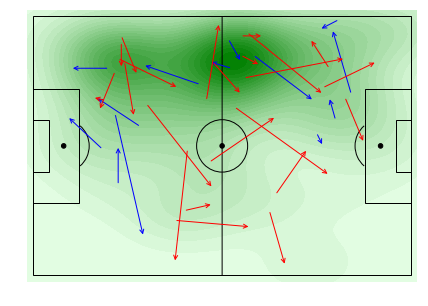

In [239]:
# Jae who had the largest number of passes made for South Korea
combine_heat_pitch_map(player_name = 'Jae-Sung Lee', type_name = 'Pass')

# Pitch-Shot-Goalmap

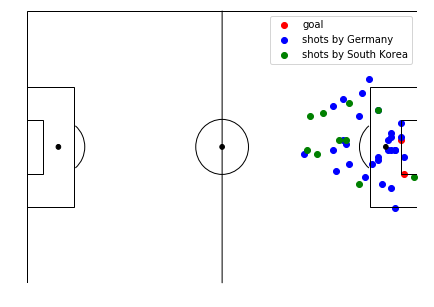

In [32]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')


# coordinate with goal
x_coor_goal = [i[0] for i in event[event.shot_outcome_name == 'Goal']['location']]
y_coor_goal = [i[1] for i in event[event.shot_outcome_name == 'Goal']['location']]

# total shots excluding ones led to goal
x_coor_nogoal_g = [i[0] for i in event[(event.shot_outcome_name != 'Goal') & (event.type_name == 'Shot') & (event.team_name == 'Germany')]['location']]
y_coor_nogoal_g = [i[1] for i in event[(event.shot_outcome_name != 'Goal') & (event.type_name == 'Shot') & (event.team_name == 'Germany')]['location']]

x_coor_nogoal_k = [i[0] for i in event[(event.shot_outcome_name != 'Goal') & (event.type_name == 'Shot') & (event.team_name == 'South Korea')]['location']]
y_coor_nogoal_k = [i[1] for i in event[(event.shot_outcome_name != 'Goal') & (event.type_name == 'Shot') & (event.team_name == 'South Korea')]['location']]



ax.scatter(x_coor_goal, y_coor_goal, c = 'red', label = 'goal')
ax.scatter(x_coor_nogoal_g, y_coor_nogoal_g, c = 'blue', label = 'shots by Germany')
ax.scatter(x_coor_nogoal_k, y_coor_nogoal_k, c = 'green', label = 'shots by South Korea')
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.legend(loc='upper right')
plt.axis('off')
plt.show()

# Analysis on Passmap/Goalmap:

From this view, we know Korean players had less shots.
Son played mostly either left or right in each period (1st half/ 2nd half), which is interesting, but there is no evidence this led to win. However, given that Koreans mostly played very defensively, (lots of back passes and Jae and Woo-Young mostly stayed in the middle except for Son) we can conclude that defensive play with Son taking the offensive role, possibly the only one played up-front, was the key for winning.

Long-story short, play defensively with clinical striker if you want to win big team!